# Cost benefit analysis of acustomer retention strategy for an online retailer 

the marketing team wants to invest in a customer retention campaigh that offers a 10% discount to high-values customers. Conduct a coist-benefit analysis to evaluate whether this campaiign is fuinancially viable. 


using the provided data estimate:
- the cost of implementing the campaign 
- the benefits in terms of increased reveneue and retained customers 
- the net gain/ loss and make a recommendation on whether the campaogn should preceede 

# Prepairing the data 

In [27]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import datetime as dt 
import seaborn as sns


In [28]:
# remove null values 
# convert date to datetime 
# engineer different features 

data = pd.read_csv('Online Retail.csv')

data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [29]:
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


a large number of customer ID have null values this suggest that a lot of customers checked out as a guest without having or creating an account. for the purpose of this annalysis theses null values will be removed.  i haev removed the customer Id that had null vales as well as the item description since we will be using the stock Code as a reference to the products that have been purchased by customers. 

In [30]:
data_clean = data.dropna(subset=['CustomerID', 'Description']).copy()

print(data_clean.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [31]:
data_clean['InvoiceDate'] = pd.to_datetime(data_clean['InvoiceDate'], format="%d/%m/%Y %H:%M")
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


# Engineer extra features 

now that the data has been cleaned up a but i am going to add some extra columns that will include useful informationf ro the analysis. based on the raw data i am provided with i will be including total purchase value, recency, frequency, average order value andhow long a customer has been active in the dataset. these features will help me explore the data and create a comprehensive analysis. 

In [32]:
# total purchase value 

data_clean['TotalPurchaseValue'] = data_clean['Quantity'] * data_clean['UnitPrice']

monetary_data = data_clean.groupby('CustomerID')['TotalPurchaseValue'].sum().reset_index()
monetary_data.columns = ['CustomerID', 'Monetary']

In [33]:
# number of days since last purchase 

reference_date = data_clean['InvoiceDate'].max()
recency_data = data_clean.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_data['Recency'] = (reference_date - recency_data['InvoiceDate']).dt.days
recency_data.drop(columns='InvoiceDate', inplace= True)
print(recency_data)

      CustomerID  Recency
0        12346.0      325
1        12347.0        1
2        12348.0       74
3        12349.0       18
4        12350.0      309
...          ...      ...
4367     18280.0      277
4368     18281.0      180
4369     18282.0        7
4370     18283.0        3
4371     18287.0       42

[4372 rows x 2 columns]


In [34]:
frequency_data = data_clean.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_data.columns = ['CustomerID', 'Frequency']
print(frequency_data)


      CustomerID  Frequency
0        12346.0          2
1        12347.0          7
2        12348.0          4
3        12349.0          1
4        12350.0          1
...          ...        ...
4367     18280.0          1
4368     18281.0          1
4369     18282.0          3
4370     18283.0         16
4371     18287.0          3

[4372 rows x 2 columns]


In [35]:
aov_data = data_clean.groupby('CustomerID').apply(lambda x: x['TotalPurchaseValue'].sum() / x['InvoiceNo'].nunique()).reset_index()
aov_data.columns = ['CustomerID', 'AvgOrderValue']
print(aov_data)


      CustomerID  AvgOrderValue
0        12346.0       0.000000
1        12347.0     615.714286
2        12348.0     449.310000
3        12349.0    1757.550000
4        12350.0     334.400000
...          ...            ...
4367     18280.0     180.600000
4368     18281.0      80.820000
4369     18282.0      58.866667
4370     18283.0     130.930000
4371     18287.0     612.426667

[4372 rows x 2 columns]


C:\Users\Maison R\AppData\Local\Temp\ipykernel_13024\1682810016.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aov_data = data_clean.groupby('CustomerID').apply(lambda x: x['TotalPurchaseValue'].sum() / x['InvoiceNo'].nunique()).reset_index()


In [36]:
tenure_data = data_clean.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max']).reset_index()
tenure_data['TenureDays'] = (tenure_data['max'] - tenure_data['min']).dt.days
tenure_data = tenure_data[['CustomerID', 'TenureDays']]
print(tenure_data)


      CustomerID  TenureDays
0        12346.0           0
1        12347.0         365
2        12348.0         282
3        12349.0           0
4        12350.0           0
...          ...         ...
4367     18280.0           0
4368     18281.0           0
4369     18282.0         118
4370     18283.0         333
4371     18287.0         158

[4372 rows x 2 columns]


In [37]:
campaign_cost = data_clean.groupby('CustomerID')['TotalPurchaseValue'].sum().reset_index()
campaign_cost['CampaignCost'] = campaign_cost['TotalPurchaseValue'] * 0.10  # 10% discount
print(campaign_cost)


      CustomerID  TotalPurchaseValue  CampaignCost
0        12346.0                0.00         0.000
1        12347.0             4310.00       431.000
2        12348.0             1797.24       179.724
3        12349.0             1757.55       175.755
4        12350.0              334.40        33.440
...          ...                 ...           ...
4367     18280.0              180.60        18.060
4368     18281.0               80.82         8.082
4369     18282.0              176.60        17.660
4370     18283.0             2094.88       209.488
4371     18287.0             1837.28       183.728

[4372 rows x 3 columns]


In [38]:
final_numbers = recency_data \
    .merge(frequency_data, on='CustomerID') \
    .merge(monetary_data, on='CustomerID') \
    .merge(aov_data, on='CustomerID') \
    .merge(tenure_data, on='CustomerID') \
    .merge(campaign_cost[['CustomerID', 'CampaignCost']], on='CustomerID')

print(final_numbers)

      CustomerID  Recency  Frequency  Monetary  AvgOrderValue  TenureDays  \
0        12346.0      325          2      0.00       0.000000           0   
1        12347.0        1          7   4310.00     615.714286         365   
2        12348.0       74          4   1797.24     449.310000         282   
3        12349.0       18          1   1757.55    1757.550000           0   
4        12350.0      309          1    334.40     334.400000           0   
...          ...      ...        ...       ...            ...         ...   
4367     18280.0      277          1    180.60     180.600000           0   
4368     18281.0      180          1     80.82      80.820000           0   
4369     18282.0        7          3    176.60      58.866667         118   
4370     18283.0        3         16   2094.88     130.930000         333   
4371     18287.0       42          3   1837.28     612.426667         158   

      CampaignCost  
0            0.000  
1          431.000  
2          1

RFM analysis ( recency, frequency and monetary) 
define thresholds to segment the top 20% of customers that would receive the 10% dicount 

In [39]:
# reference date for RFM analysis 
rfm_data = data_clean.copy()
reference_date = rfm_data['InvoiceDate'].max() + pd.Timedelta(days=1)

In [40]:
# RFM values 

rfm = rfm_data.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x: (reference_date - x.max()).days,
    'InvoiceNo' : 'nunique',
    'TotalPurchaseValue' : 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
print(rfm)

      CustomerID  Recency  Frequency  Monetary
0        12346.0      326          2      0.00
1        12347.0        2          7   4310.00
2        12348.0       75          4   1797.24
3        12349.0       19          1   1757.55
4        12350.0      310          1    334.40
...          ...      ...        ...       ...
4367     18280.0      278          1    180.60
4368     18281.0      181          1     80.82
4369     18282.0        8          3    176.60
4370     18283.0        4         16   2094.88
4371     18287.0       43          3   1837.28

[4372 rows x 4 columns]


In [41]:
#rfm score from 1 to 5 (high score = better customer)

rfm['R'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method= 'first'), 5, labels =[1,2,3,4,5])
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

In [42]:
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
print(rfm)

      CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Score
0        12346.0      326          2      0.00  1  2  1       121
1        12347.0        2          7   4310.00  5  4  5       545
2        12348.0       75          4   1797.24  2  3  4       234
3        12349.0       19          1   1757.55  4  1  4       414
4        12350.0      310          1    334.40  1  1  2       112
...          ...      ...        ...       ... .. .. ..       ...
4367     18280.0      278          1    180.60  1  2  1       121
4368     18281.0      181          1     80.82  1  2  1       121
4369     18282.0        8          3    176.60  5  3  1       531
4370     18283.0        4         16   2094.88  5  5  5       555
4371     18287.0       43          3   1837.28  3  3  4       334

[4372 rows x 8 columns]


In [ ]:
def segment_customer(row):
    if row['RFM_Score'] == '555':
        return 'Champions'
    elif row['R'] == 5:
        return 'Recent Buyers'
    elif row['F'] == 5:
        return 'Loyal Customers'
    elif row['M'] == 5:
        return 'Big Spenders'
    elif row['R'] == 1:
        return 'Lost'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

print(rfm)

# originally was too narrow and needed to adjust to have them be intefers adn nto strings. as strings it didnt refister 
# the different segments only champion and other. once chnaging it to int it was able to register the different sefments 

      CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Score  \
0        12346.0      326          2      0.00  1  2  1       121   
1        12347.0        2          7   4310.00  5  4  5       545   
2        12348.0       75          4   1797.24  2  3  4       234   
3        12349.0       19          1   1757.55  4  1  4       414   
4        12350.0      310          1    334.40  1  1  2       112   
...          ...      ...        ...       ... .. .. ..       ...   
4367     18280.0      278          1    180.60  1  2  1       121   
4368     18281.0      181          1     80.82  1  2  1       121   
4369     18282.0        8          3    176.60  5  3  1       531   
4370     18283.0        4         16   2094.88  5  5  5       555   
4371     18287.0       43          3   1837.28  3  3  4       334   

            Segment  
0              Lost  
1     Recent Buyers  
2            Others  
3            Others  
4              Lost  
...             ...  
4367           Lo

In [95]:
# revenue per customer segment 
data_clean['Revenue'] = data_clean['Quantity'] * data_clean['UnitPrice']

# Then aggregate by CustomerID
customer_revenue = data_clean.groupby('CustomerID')['Revenue'].sum().reset_index()
customer_revenue.columns = ['CustomerID', 'TotalRevenue']


rfm_revenue = pd.merge(rfm, customer_revenue, on='CustomerID', how='left')


segment_revenue = rfm_revenue.groupby('Segment')['TotalRevenue'].sum().reset_index().round(2)
segment_revenue.columns = ['Segment', 'TotalRevenue']
print("Tptal Revenue Per Segment:")
print(segment_revenue)


print("Mean Revenue Per Segment:")
print(rfm_revenue.groupby('Segment')['TotalRevenue'].mean().round(2))



Tptal Revenue Per Segment:
           Segment  TotalRevenue
0     Big Spenders     613723.21
1        Champions    3800584.84
2             Lost     296459.59
3  Loyal Customers    1718664.59
4           Others    1229710.87
5    Recent Buyers     640922.71
Mean Revenue Per Segment:
Segment
Big Spenders        3299.59
Champions          11080.42
Lost                 350.01
Loyal Customers     3819.25
Others               610.88
Recent Buyers       1202.48
Name: TotalRevenue, dtype: float64


# Estimate the campaign costs 

For the purpose of this project i will be using randomly geneated financial costs for the campaign. Based on these estimates we can detemine hthe campaign size, cost per customer, estimated redemption rate, coupon cost and overall cost based on the customer type.  

| **Cost Type**               | **Value**                | **Details**                                            |
| --------------------------- | ------------------------ | ------------------------------------------------------ |
| **Email cost**              | `$0.01` per email        | Using services like Mailchimp or SendGrid on low tiers |
| **SMS cost**                | `$0.05` per SMS          | If using Twilio or similar providers                   |
| **Design cost**             | `$300` one-time          | Graphics, copywriting, landing page                    |
| **Discount per redemption** | `$5` per customer        | E.g., 10% off, free shipping, or loyalty points        |
| **Redemption rate**         | `10%`                    | Reasonable for targeted email campaigns                |
| **Ad spend**                | `$500–$1000` total       | If running Google/Facebook remarketing ads             |
| **Follow-up emails**        | `$0.01` × 2 per customer | Optional 2 extra reminders per person                  |



In [44]:
# Suppose you want to target "Champions"
target_group = rfm[rfm['Segment'] == 'Champions']
num_customers = len(target_group)

email_cost_per = 0.01
sms_cost_per = 0.05
design_cost = 300 # one off cost 
discount_per_redemption = 5
expected_redemption_rate = 0.10  # 10%
ad_spend = 750

# Cost calculations
email_cost = num_customers * email_cost_per
coupon_cost = num_customers * expected_redemption_rate * discount_per_redemption
total_campaign_cost = email_cost + design_cost + coupon_cost + ad_spend

print(f"Target customers: {target_group['Segment'].unique()}")
print(f"Total customers: {num_customers}")
print(f"Email cost: ${email_cost:.2f}")
print(f"Coupon cost: ${coupon_cost:.2f}")
print(f"Ad spend: ${ad_spend:.2f}")
print(f"Design cost: ${design_cost:.2f}")
print(f"Total estimated campaign cost: ${total_campaign_cost:.2f}")

Target customers: ['Champions']
Total customers: 343
Email cost: $3.43
Coupon cost: $171.50
Ad spend: $750.00
Design cost: $300.00
Total estimated campaign cost: $1224.93


estimate the campaign benefits + the net ebenefit 

based on our previouse analysis we can determine hwo much revenue and porfit this campaign will generate. i will look at the converson rate, average order value, purchase frequncey and retention period to detemine if this campaign will be beneficial to the company. 

In [45]:
# from the segmented customer we will specify which customers to target 

target_group = rfm[rfm['Segment'] == 'Champions']
num_customers = len(target_group)


In [46]:
# conversion rate, the percentage of teh target group that will engage with the campaign 
#As actual campaign response labels were unavailable, a conservative 15% conversion rate 
# was assumed based on industry benchmarks for email re-engagement campaigns

conversion_rate = 0.15 
expected_conversions = num_customers * conversion_rate



In [88]:
# revenue per converted customer 
avg_order_value = target_group['Monetary'].mean()
expected_purchases_per_customer = 1.5  # Assume some buy twice

revenue_per_conversion = avg_order_value * expected_purchases_per_customer


In [48]:
# total expected revenue 
expected_total_revenue = expected_conversions * revenue_per_conversion
print(f"Expected total revenue: ${expected_total_revenue:.2f}")

Expected total revenue: $855131.59


visuals + dashboard

- heatmap of rfm scores ( helps identify clusters)
- bar chart per customer segment 
- pir or bar chart fot cost breakdown 
- bar chart for expected revenue by segment 
- line or area plot of ROI over time 
- key metric paenk ( campaign cost, expected revenue, expected ROI, target customers, expected conversion )


C:\Users\Maison R\AppData\Local\Temp\ipykernel_13024\4178562242.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_matrix = rfm.groupby(['R', 'F']).size().unstack()


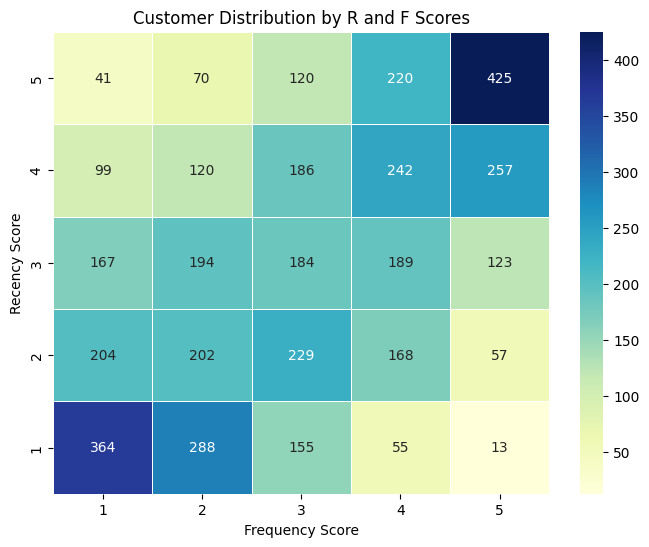

In [49]:
# heatmap 
rfm_matrix = rfm.groupby(['R', 'F']).size().unstack()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_matrix, cmap='YlGnBu', annot=True, fmt="d", linewidths=0.5)

# Label axes
plt.title("Customer Distribution by R and F Scores")
plt.xlabel("Frequency Score")
plt.ylabel("Recency Score")

plt.show()

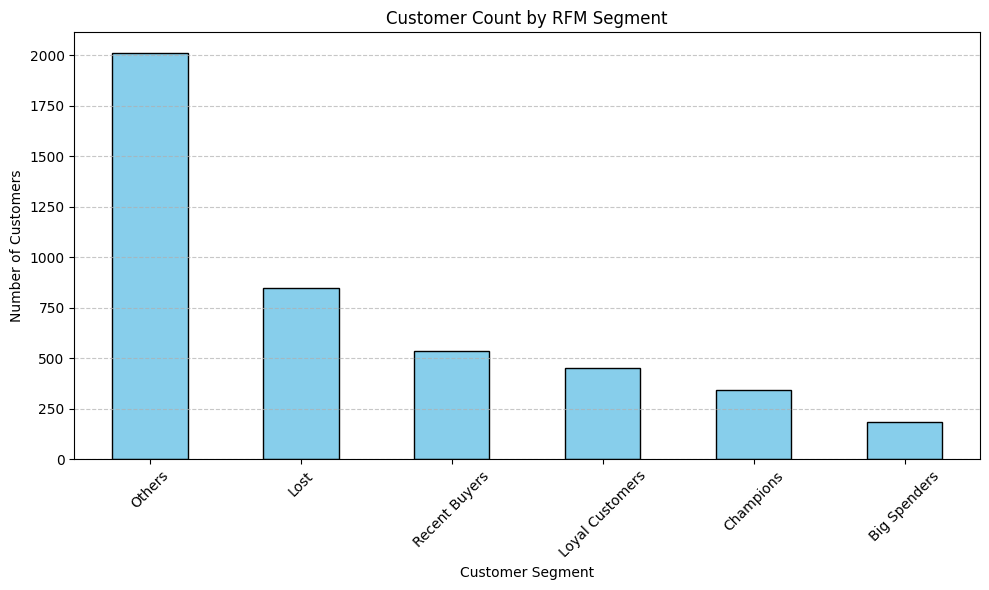

In [56]:
#bar chart per customer segment 

segment_counts = rfm['Segment'].value_counts().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Customer Count by RFM Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

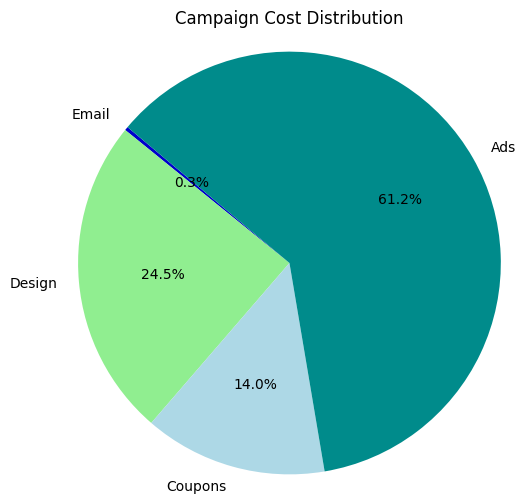

In [76]:
# pie or bar chart for cost breakdown 

labels = ['Email', 'Design', 'Coupons', 'Ads']
sizes = [email_cost, design_cost, coupon_cost, ad_spend]
colors = ["mediumblue", "lightgreen","lightBlue", "darkcyan" ]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Campaign Cost Distribution")
plt.axis('equal')  # Keeps pie as a circle
plt.show()

<BarContainer object of 6 artists>

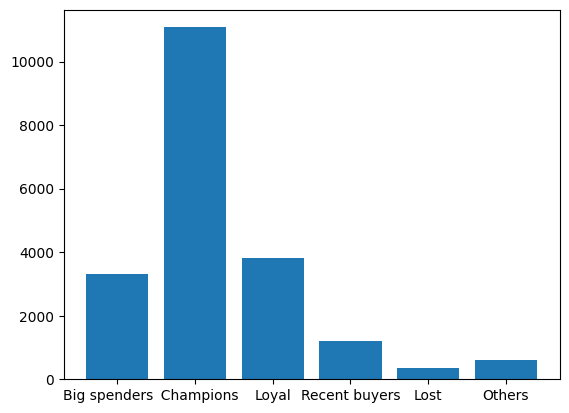

In [103]:
# bar chart for expected  Mean revenue by segment 

segments = ['Big spenders    ', '  Champions', 'Loyal', 'Recent buyers', 'Lost', 'Others']
revenues = [3299.59, 11080.32, 3819.25, 1202.48, 350.01, 610.88]
plt.bar(segments, revenues)

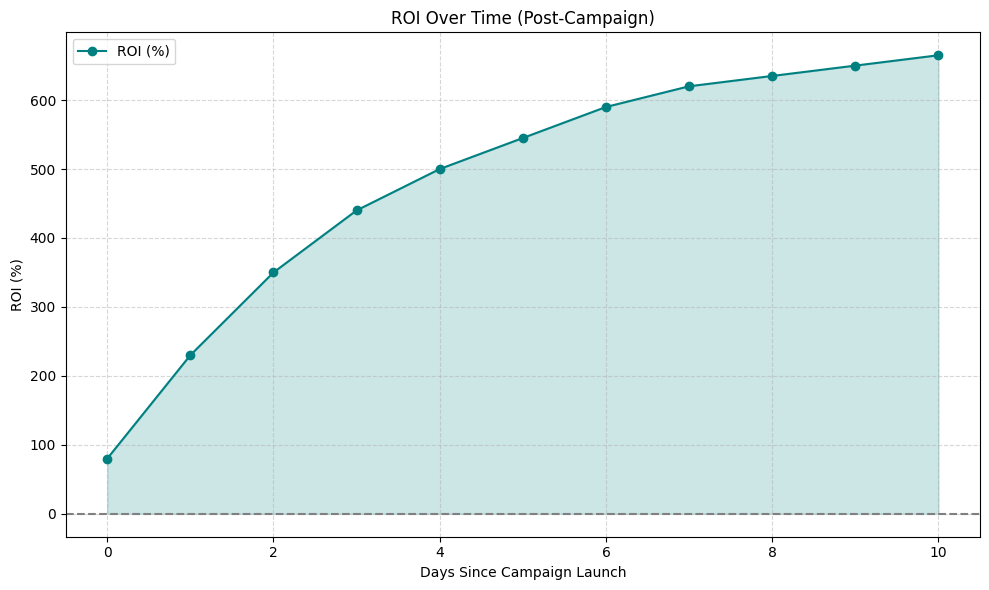

In [110]:
# line or area chart plot for ROI over time 
# Simulate data
days = list(range(11))  # Day 0 to 10
daily_revenue = [900, 750, 600, 450, 300, 225, 225, 150, 75, 75, 75]  # growing revenue
cumulative_revenue = pd.Series(daily_revenue).cumsum()

campaign_cost = 500  # fixed cost on day 0
cumulative_cost = [campaign_cost] * len(days)

# Calculate ROI
roi = (cumulative_revenue - campaign_cost) / campaign_cost * 100

# Create DataFrame
roi_df = pd.DataFrame({
    'Day': days,
    'Revenue': cumulative_revenue,
    'Cost': cumulative_cost,
    'ROI (%)': roi
})

# Plot
plt.figure(figsize=(10, 6))
plt.plot(roi_df['Day'], roi_df['ROI (%)'], marker='o', label='ROI (%)', color='teal')
plt.fill_between(roi_df['Day'], roi_df['ROI (%)'], alpha=0.2, color='teal')
plt.axhline(0, linestyle='--', color='gray')  # break-even line

plt.title("ROI Over Time (Post-Campaign)")
plt.xlabel("Days Since Campaign Launch")
plt.ylabel("ROI (%)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# KPI card

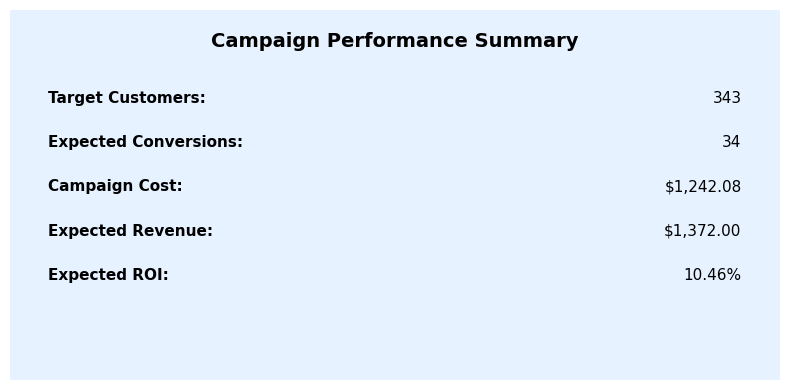

In [113]:
target_customers = 343

# Cost calculations
email_cost = email_cost_per * target_customers
sms_cost = sms_cost_per * target_customers
coupon_cost = discount_per_redemption * expected_redemption_rate * target_customers

campaign_cost = email_cost + sms_cost + coupon_cost + design_cost + ad_spend

# Revenue estimation
avg_revenue_per_conversion = 40  # You can set this based on past data
expected_conversions = target_customers * expected_redemption_rate
expected_revenue = expected_conversions * avg_revenue_per_conversion

# ROI
expected_roi = (expected_revenue - campaign_cost) / campaign_cost * 100
# Create KPI Card
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')

# Background rectangle
card_color = '#e6f2ff'
rect = plt.Rectangle((0, 0), 1, 1, transform=ax.transAxes, color=card_color)
ax.add_patch(rect)

# Title
ax.text(0.5, 0.9, "Campaign Performance Summary", fontsize=14, weight='bold', ha='center')

# Metrics
metrics = [
    ("Target Customers", f"{target_customers}"),
    ("Expected Conversions", f"{expected_conversions:.0f}"),
    ("Campaign Cost", f"${campaign_cost:,.2f}"),
    ("Expected Revenue", f"${expected_revenue:,.2f}"),
    ("Expected ROI", f"{expected_roi:.2f}%")
]

# Add metrics to card
for i, (label, value) in enumerate(metrics):
    y = 0.75 - i * 0.12
    ax.text(0.05, y, label + ":", fontsize=11, weight='bold', transform=ax.transAxes)
    ax.text(0.95, y, value, fontsize=11, ha='right', transform=ax.transAxes)

plt.tight_layout()
plt.show()